In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read Data

In [45]:
df = pd.read_csv('/content/Copy of brentcrudeoil - dailybrentoil.csv')
df

,Date,Close,chg(close),Low,chg(low),High,chg(high),Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1/4/2021 23:58:00,50.23,50.23,49.97,49.97,51.88,51.88,NaN,NaN,
1,1/5/2021 23:58:00,51.87,1.64,50.01,0.04,52.26,0.38,NaN,NaN,NaN
2,1/6/2021 23:58:00,52.02,0.15,51.21,1.20,52.37,0.11,NaN,NaN,NaN
3,1/7/2021 23:58:00,52.20,0.18,51.89,0.68,52.34,-0.03,NaN,NaN,NaN
4,1/8/2021 23:58:00,53.33,1.13,52.31,0.42,53.61,1.27,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
753,1/3/2024 23:58:00,78.25,2.36,74.79,-0.81,78.67,-0.37,NaN,NaN,NaN
754,1/4/2024 23:58:00,77.59,-0.66,76.50,1.71,79.40,0.73,NaN,NaN,NaN
755,1/5/2024 23:58:00,78.14,0.55,77.14,0.64,78.50,-0.90,NaN,NaN,NaN
756,1/8/2024 23:58:00,75.60,-2.54,74.95,-2.19,77.47,-1.03,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        758 non-null    object 
 1   Close       758 non-null    float64
 2   chg(close)  758 non-null    float64
 3   Low         758 non-null    float64
 4   chg(low)    758 non-null    float64
 5   High        758 non-null    float64
 6   chg(high)   758 non-null    float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  1 non-null      object 
dtypes: float64(8), object(2)
memory usage: 59.3+ KB


## Detail Attributes


Date: This is the timestamp indicating when the observation was recorded. It represents the date on which the oil price data was collected.

Close: The closing price of oil on the specified date. The closing price is the last traded price of oil for that particular day.

chg(close): This likely represents the change in the closing price from the previous day. It is the difference between the closing price on the current day and the closing price on the previous day.

Low: The lowest price of oil on the specified date. It represents the minimum price at which oil traded during that day.

chg(low): Similar to "chg(close)," this is probably the change in the low price from the previous day. It is the difference between the low price on the current day and the low price on the previous day.

High: The highest price of oil on the specified date. It represents the maximum price at which oil traded during that day.

chg(high): Similar to "chg(close)" and "chg(low)," this is likely the change in the high price from the previous day. It is the difference between the high price on the current day and the high price on the previous day.

# Data Cleaning

In [47]:
df = df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1)
df

,Date,Close,chg(close),Low,chg(low),High,chg(high)
0,1/4/2021 23:58:00,50.23,50.23,49.97,49.97,51.88,51.88
1,1/5/2021 23:58:00,51.87,1.64,50.01,0.04,52.26,0.38
2,1/6/2021 23:58:00,52.02,0.15,51.21,1.20,52.37,0.11
3,1/7/2021 23:58:00,52.20,0.18,51.89,0.68,52.34,-0.03
4,1/8/2021 23:58:00,53.33,1.13,52.31,0.42,53.61,1.27
...,...,...,...,...,...,...,...
753,1/3/2024 23:58:00,78.25,2.36,74.79,-0.81,78.67,-0.37
754,1/4/2024 23:58:00,77.59,-0.66,76.50,1.71,79.40,0.73
755,1/5/2024 23:58:00,78.14,0.55,77.14,0.64,78.50,-0.90
756,1/8/2024 23:58:00,75.60,-2.54,74.95,-2.19,77.47,-1.03


In [48]:
df.isnull().sum()

Date          0
Close         0
chg(close)    0
Low           0
chg(low)      0
High          0
chg(high)     0
dtype: int64

In [49]:
df.describe()

,Close,chg(close),Low,chg(low),High,chg(high)
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,80.313799,0.101332,79.188826,0.099485,81.377098,0.102032
std,12.330876,2.722913,12.059141,2.564026,12.669049,2.643323
min,50.230000,-17.140000,49.970000,-13.990000,51.880000,-18.050000
25%,72.437500,-0.797500,71.450000,-0.680000,73.352500,-0.577500
50%,79.825000,0.210000,78.795000,0.140000,80.775000,0.160000
75%,88.225000,1.080000,87.235000,0.997500,90.337500,0.850000
max,114.190000,50.230000,113.390000,49.970000,115.060000,51.880000


In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2021-01-04 23:58:00 to 2024-01-09 23:58:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       758 non-null    float64
 1   chg(close)  758 non-null    float64
 2   Low         758 non-null    float64
 3   chg(low)    758 non-null    float64
 4   High        758 non-null    float64
 5   chg(high)   758 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


# Data Exploration

<Axes: >

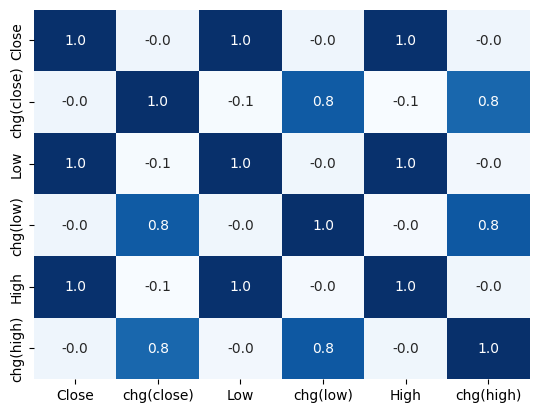

In [52]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [53]:
correlation_matrix = df.corr()
correlation_matrix

,Close,chg(close),Low,chg(low),High,chg(high)
Close,1.000000,-0.016085,0.995992,-0.020903,0.994432,-0.019980
chg(close),-0.016085,1.000000,-0.059770,0.823656,-0.069405,0.772372
Low,0.995992,-0.059770,1.000000,-0.027181,0.995370,-0.037707
chg(low),-0.020903,0.823656,-0.027181,1.000000,-0.049845,0.835308
High,0.994432,-0.069405,0.995370,-0.049845,1.000000,-0.025813
chg(high),-0.019980,0.772372,-0.037707,0.835308,-0.025813,1.000000


In [54]:
df.columns

Index(['Close', 'chg(close)', 'Low', 'chg(low)', 'High', 'chg(high)'], dtype='object')

In [55]:
df.index

DatetimeIndex(['2021-01-04 23:58:00', '2021-01-05 23:58:00',
               '2021-01-06 23:58:00', '2021-01-07 23:58:00',
               '2021-01-08 23:58:00', '2021-01-11 23:58:00',
               '2021-01-12 23:58:00', '2021-01-13 23:58:00',
               '2021-01-14 23:58:00', '2021-01-15 23:58:00',
               ...
               '2023-12-26 23:58:00', '2023-12-27 23:58:00',
               '2023-12-28 23:58:00', '2023-12-29 23:58:00',
               '2024-01-02 23:58:00', '2024-01-03 23:58:00',
               '2024-01-04 23:58:00', '2024-01-05 23:58:00',
               '2024-01-08 23:58:00', '2024-01-09 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=758, freq=None)

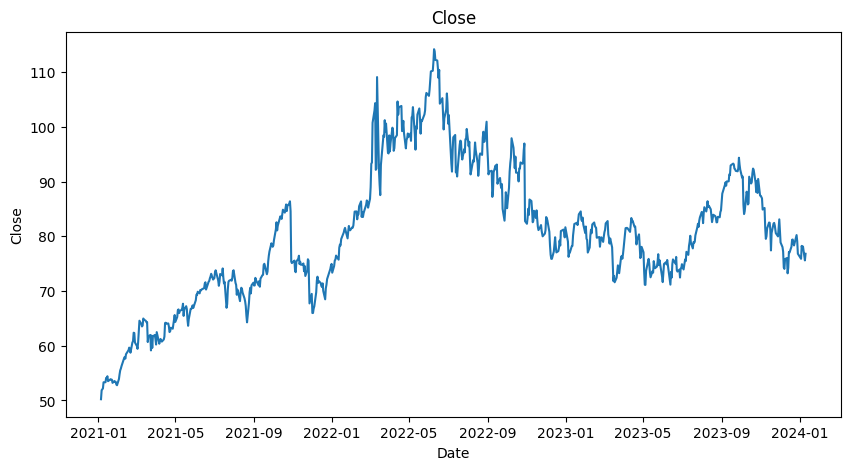

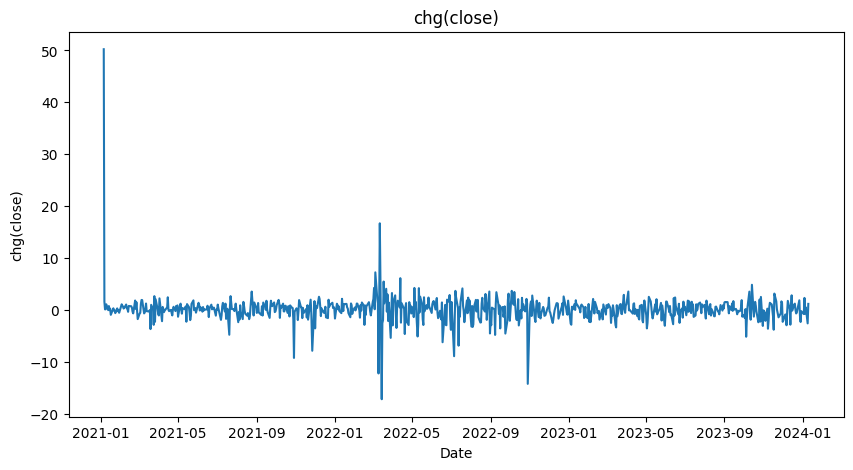

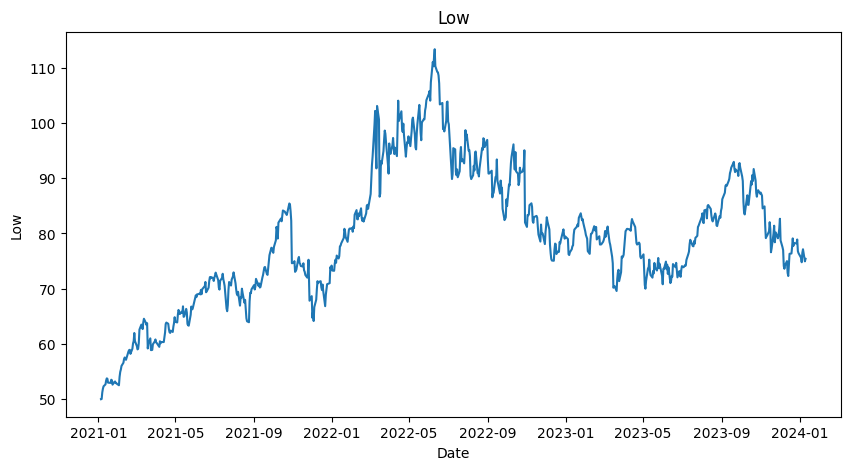

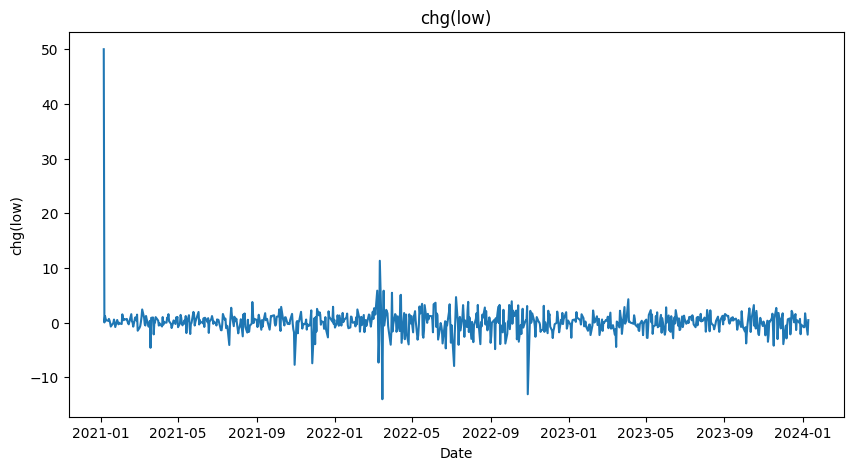

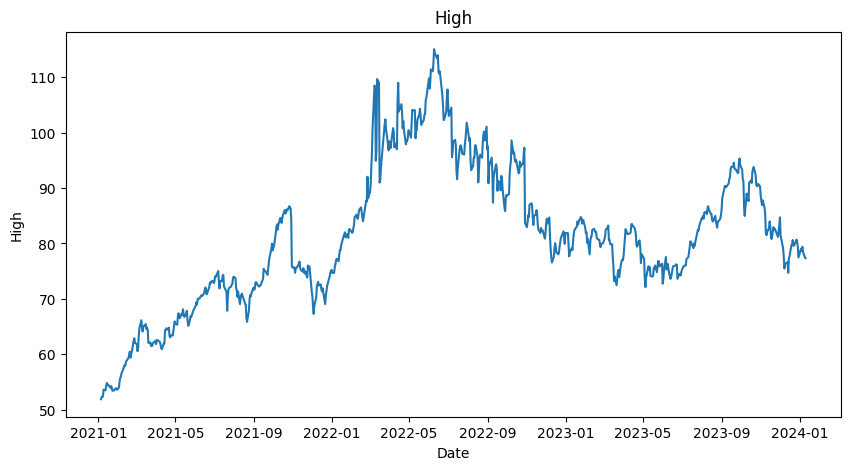

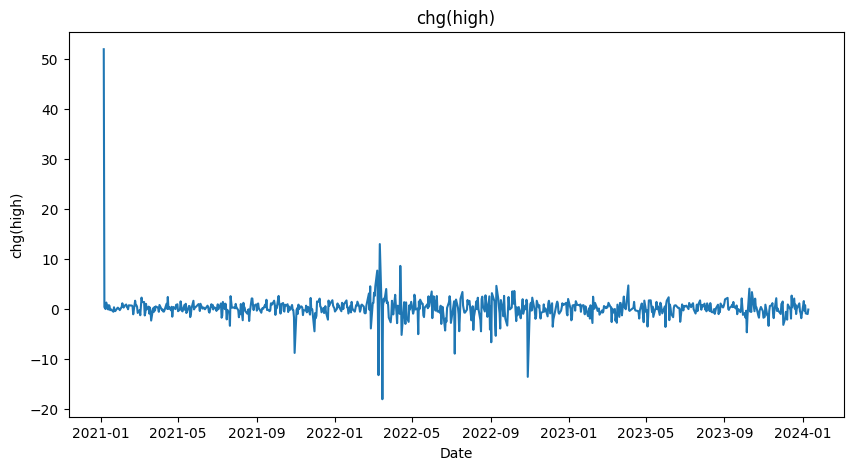

In [56]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'{column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

In [57]:
# train_size = int(len(df) * 0.8)
# train, test = df[:train_size], df[train_size:]
X = df.drop('Close', axis=1)
y = df['Close']

In [58]:
X

,chg(close),Low,chg(low),High,chg(high)
Date,,,,,
2021-01-04 23:58:00,50.23,49.97,49.97,51.88,51.88
2021-01-05 23:58:00,1.64,50.01,0.04,52.26,0.38
2021-01-06 23:58:00,0.15,51.21,1.20,52.37,0.11
2021-01-07 23:58:00,0.18,51.89,0.68,52.34,-0.03
2021-01-08 23:58:00,1.13,52.31,0.42,53.61,1.27
...,...,...,...,...,...
2024-01-03 23:58:00,2.36,74.79,-0.81,78.67,-0.37
2024-01-04 23:58:00,-0.66,76.50,1.71,79.40,0.73
2024-01-05 23:58:00,0.55,77.14,0.64,78.50,-0.90


In [59]:
y

Date
2021-01-04 23:58:00    50.23
2021-01-05 23:58:00    51.87
2021-01-06 23:58:00    52.02
2021-01-07 23:58:00    52.20
2021-01-08 23:58:00    53.33
                       ...  
2024-01-03 23:58:00    78.25
2024-01-04 23:58:00    77.59
2024-01-05 23:58:00    78.14
2024-01-08 23:58:00    75.60
2024-01-09 23:58:00    76.81
Name: Close, Length: 758, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [62]:
print(len(X_train))
print(len(X_test))

606
152


In [63]:
# print(len(df[:train_size]))
# print(len(df[train_size:]))

In [64]:
model = ARIMA(y, order=(1, 1, 1))  # Example order, you may need to tune this
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
predictions = fit_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

In [72]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 12.337530728478008
Mean Squared Error: 238.44774020203286
Root Mean Squared Error: 15.44175314535344


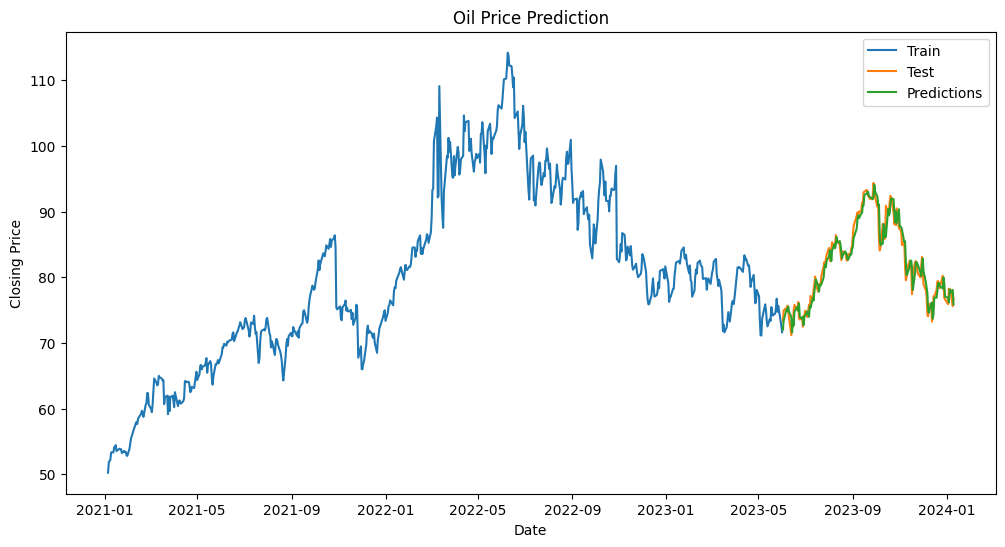

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(predictions, label='Predictions')
plt.title('Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

to be continued